In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import os

%matplotlib inline

In [2]:
ground = "with_ground"
# ground = "no_ground"
seq_name = f"160317_moonbaby1_{ground}"
# seq_name = f"160422_haggling1_{ground}"
data_path = os.path.join(
    f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
    seq_name,
)

In [3]:
color_bitrate = 100000
data_dict = {}

for depth_bitrate in range(10000, 200001, 10000):
    color_bitrate_m = color_bitrate // 1000
    depth_birate_m = depth_bitrate // 1000
    data_filepath = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
        f"3D_c{color_bitrate_m}m_d_yuv{depth_birate_m}m_pssim.csv",
    )

    data = pd.read_csv(data_filepath)
    column_names = list(data.columns)[1:]

    # fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    # for column_name in column_names:
    #     ax.plot(data["Frame"], data[column_name], label=column_name)
    #     ax.set_ylabel(column_name)
    #     ax.set_ylim(0.0, 100.0)
    # ax.legend()
    # ax.set_title(f"Color: {color_bitrate_m}m, Depth: {depth_birate_m}m")
    # ax.set_xlabel("Frame ID")
    # ax.set_ylabel("Metric")
    # plt.show()

    # Boxplot

    data_dict[depth_bitrate] = data

In [4]:
# Box plot for each metric for all depth bitrates

metric_names = ["PSSIM_GEO_AB", "PSSIM_GEO_BA", "PSSIM_COLOR_AB", "PSSIM_COLOR_BA"]

metric_name = "PSSIM_GEO_AB"
metric_dict = {}
for depth_birate in data_dict.keys():
    data = data_dict[depth_birate]
    data = data[metric_name]
    metric_dict[depth_birate] = data
# print(metric_dict.keys())

In [5]:
list(data_dict[10000].columns)
metric_names = ["PSSIM_GEO_AB", "PSSIM_GEO_BA", "PSSIM_COLOR_AB", "PSSIM_COLOR_BA"]

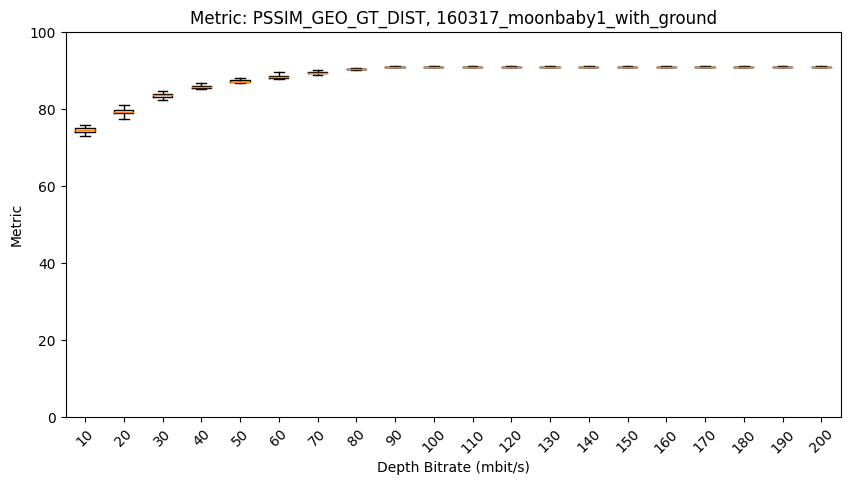

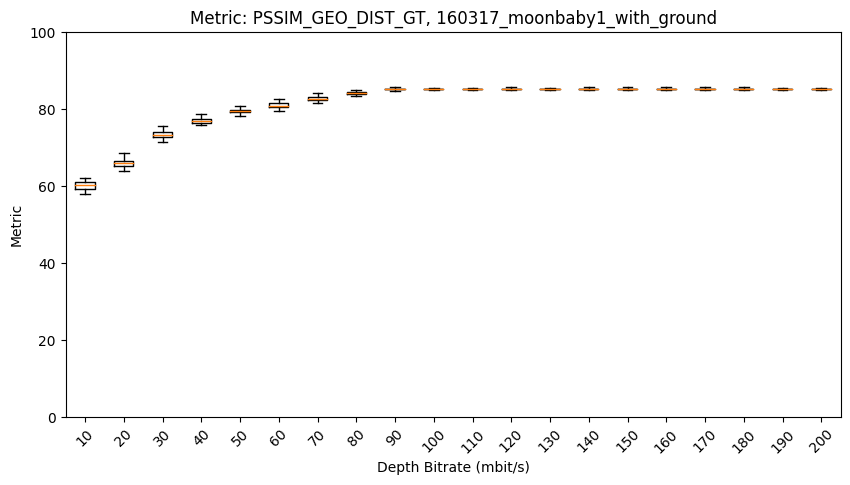

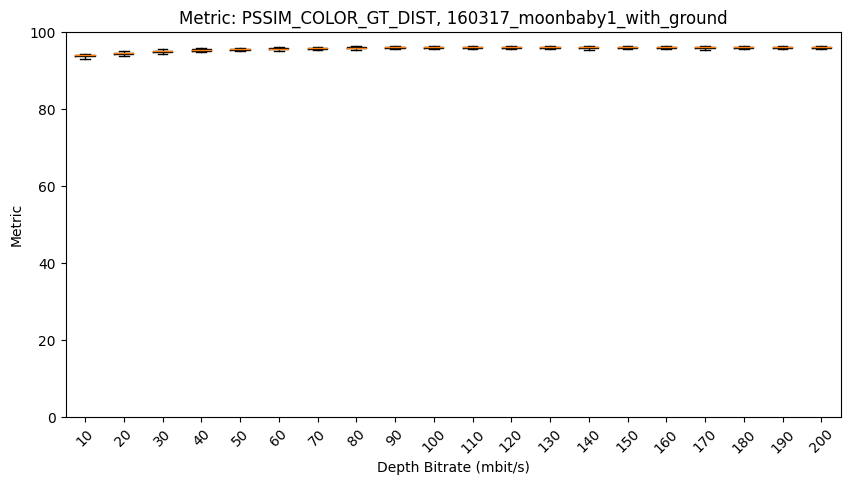

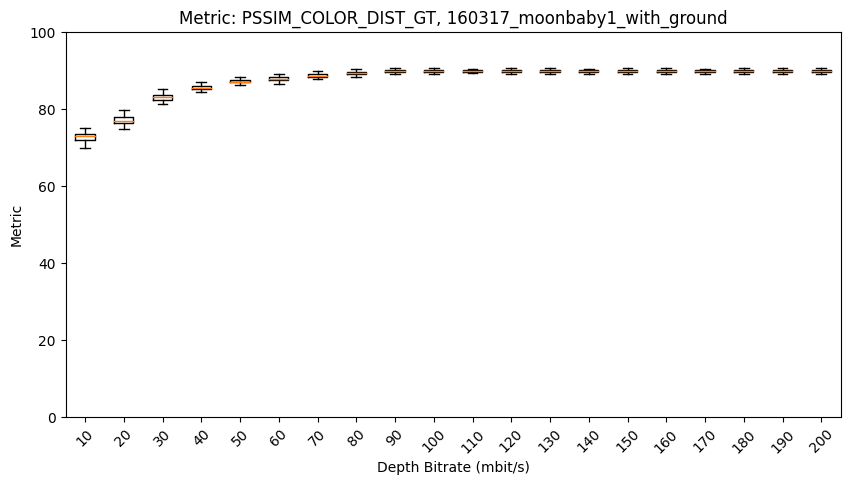

In [6]:
# Box plot for each metric for all depth bitrates

metric_names = ["PSSIM_GEO_AB", "PSSIM_GEO_BA", "PSSIM_COLOR_AB", "PSSIM_COLOR_BA"]
metric_names_exp = [
    "PSSIM_GEO_GT_DIST",
    "PSSIM_GEO_DIST_GT",
    "PSSIM_COLOR_GT_DIST",
    "PSSIM_COLOR_DIST_GT",
]

for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
    metric_dict = {}
    for depth_birate in data_dict.keys():
        data = data_dict[depth_birate]
        data = data[metric_name]
        metric_dict[depth_birate] = data
    depth_birate_m = [depth_birate // 1000 for depth_birate in metric_dict.keys()]

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.boxplot(metric_dict.values(), showfliers=False)
    ax.set_xticklabels(depth_birate_m, rotation=45)
    ax.set_title(f"Metric: {metric_name_exp}, {seq_name}")
    ax.set_xlabel("Depth Bitrate (mbit/s)")
    ax.set_ylabel("Metric")
    ax.set_ylim(0.0, 100.0)
    plt.show()

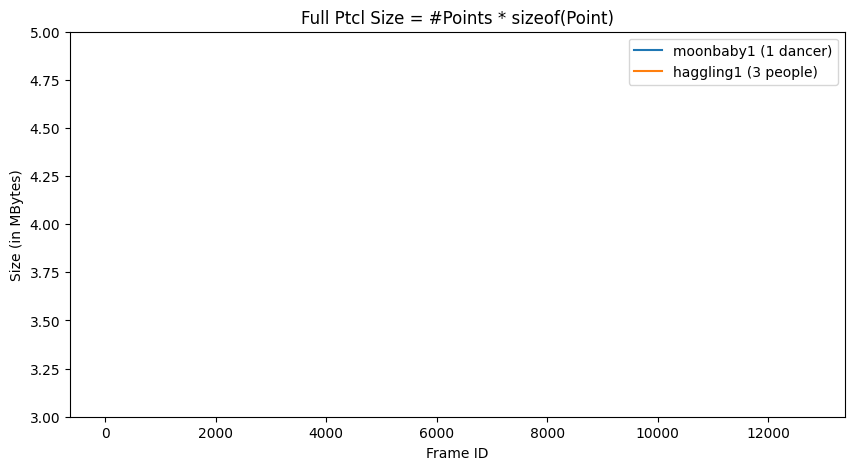

In [7]:
seq_names = [f"160317_moonbaby1_{ground}", f"160422_haggling1_{ground}"]
labels = ["moonbaby1 (1 dancer)", "haggling1 (3 people)"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for seq_name, label in zip(seq_names, labels):
    fsize_filepath = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
        f"frustum_size.csv",
    )
    fsize_data = pd.read_csv(fsize_filepath)

    column_names = list(fsize_data.columns)
    fsize_data[column_names[1]] /= 1024.0 * 1024.0

    ax.plot(fsize_data[column_names[0]], fsize_data[column_names[1]], label=label)
    ax.hlines(
        y=np.mean(fsize_data[column_names[1]]),
        xmin=0,
        xmax=len(fsize_data[column_names[1]]),
        color="r",
        linestyle="-",
    )
ax.set_title("Full Ptcl Size = #Points * sizeof(Point)")
ax.set_xlabel("Frame ID")
ax.set_ylabel("Size (in MBytes)")
ax.set_ylim(3.0, 5.0)
ax.legend()
# ax.legend(labels)
plt.show()

In [8]:
fsize_data

,Frame,FrustumPoints,Frustum_Size(in bytes)
0,150,0.663260,4172868
1,151,0.663181,4172376
2,152,0.663737,4175874
3,153,0.665176,4184928
4,154,0.662675,4169190
...,...,...,...
12597,12747,0.734509,4621134
12598,12748,0.734592,4621656
12599,12749,0.735827,4629426
12600,12750,0.736713,4635000


In [9]:
ground = "with_ground"
# ground = "no_ground"
seq_names = [f"160317_moonbaby1_{ground}", f"160422_haggling1_{ground}"]
data_paths = [
    os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )
    for seq_name in seq_names
]

TypeError: unsupported operand type(s) for /: 'dict_values' and 'int'

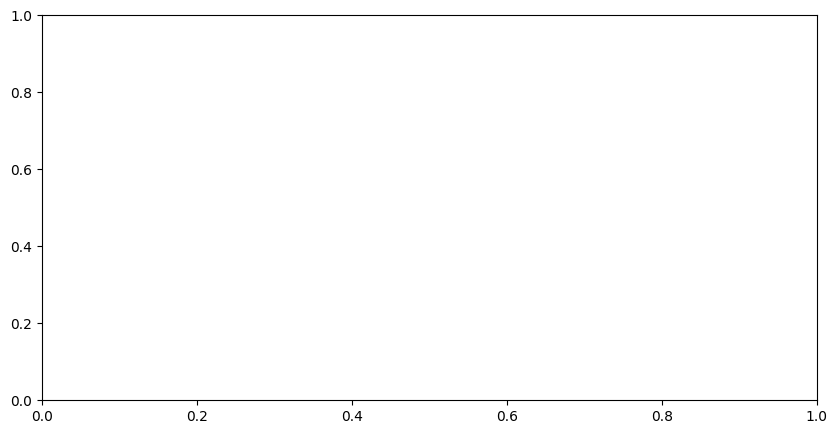

In [10]:
color_bitrate = 100000
metric_names = ["PSSIM_GEO_AB", "PSSIM_GEO_BA", "PSSIM_COLOR_AB", "PSSIM_COLOR_BA"]
metric_names_exp = [
    "PSSIM_GEO_GT_DIST",
    "PSSIM_GEO_DIST_GT",
    "PSSIM_COLOR_GT_DIST",
    "PSSIM_COLOR_DIST_GT",
]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrates = range(10000, 200001, 10000)
depth_bitrates_m = [depth_bitrate // 1000 for depth_bitrate in depth_bitrates]
color_bitrate_m = color_bitrate // 1000

for seq_name in seq_names:
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for depth_bitrate, depth_bitrate_m in zip(depth_bitrates, depth_bitrates_m):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_m}m_d_yuv{depth_bitrate_m}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[depth_bitrate] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for depth_bitrate, depth_bitrate_m in zip(depth_bitrates, depth_bitrates_m):
            data = data_dict[depth_birate]
            data = data[metric_name]
            metric_dict[depth_birate] = data

            # ax.boxplot(metric_dict.values(), showfliers=False)
            ax.plot(depth_birate_m, np.mean(metric_dict.values()))

# ax.set_xticklabels(depth_birate_m, rotation=45)
ax.set_title(f"Metric: {metric_name_exp}")
ax.set_xlabel("Depth Bitrate (mbit/s)")
ax.set_ylabel("Metric")
ax.set_ylim(0.0, 100.0)

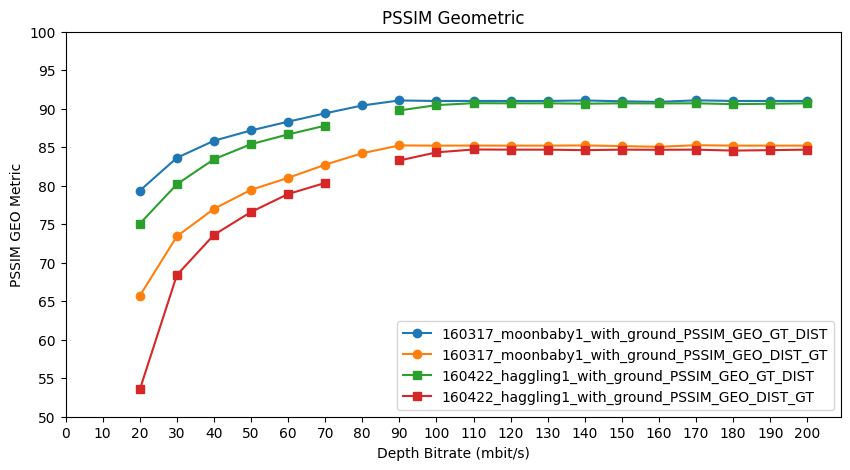

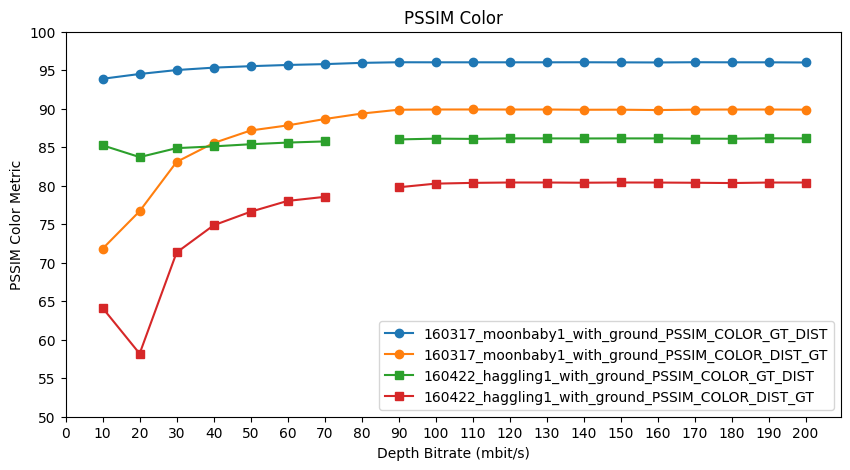

In [ ]:
# Fix color at 100 mbps and vary depth bitrate
# Metric vs Depth bitrate

################# PSSIM Geometric ####################

ground = "with_ground"
seq_names = [f"160317_moonbaby1_{ground}", f"160422_haggling1_{ground}"]


color_bitrate = 100000
metric_names = ["PSSIM_GEO_AB", "PSSIM_GEO_BA"]
metric_names_exp = ["PSSIM_GEO_GT_DIST", "PSSIM_GEO_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrates = list(range(20000, 200001, 10000))
depth_bitrates_m = [depth_bitrate // 1000 for depth_bitrate in depth_bitrates]
color_bitrate_m = color_bitrate // 1000

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, marker in zip(seq_names, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for depth_bitrate, depth_bitrate_m in zip(depth_bitrates, depth_bitrates_m):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_m}m_d_yuv{depth_bitrate_m}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[depth_bitrate] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for depth_bitrate, depth_bitrate_m in zip(depth_bitrates, depth_bitrates_m):
            data = data_dict[depth_bitrate]
            data = data[metric_name]
            metric_dict[depth_bitrate] = data.mean(axis=0)
        ax.plot(
            depth_bitrates_m,
            list(metric_dict.values()),
            label=seq_name + "_" + metric_name_exp,
            marker=marker,
        )

ax.set_ylim(50.0, 100.0)
ax.set_yticks(np.arange(50, 101, 5))
ax.set_xticks(np.arange(0, 201, 10))
ax.set_ylabel("PSSIM GEO Metric")
ax.set_xlabel("Depth Bitrate (mbit/s)")
ax.set_title("PSSIM Geometric")
ax.legend(loc="lower right")

############## PSSIM Color ##############

ground = "with_ground"
seq_names = [f"160317_moonbaby1_{ground}", f"160422_haggling1_{ground}"]


color_bitrate = 100000
metric_names = ["PSSIM_COLOR_AB", "PSSIM_COLOR_BA"]
metric_names_exp = ["PSSIM_COLOR_GT_DIST", "PSSIM_COLOR_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrates = range(10000, 200001, 10000)
depth_bitrates_m = [depth_bitrate // 1000 for depth_bitrate in depth_bitrates]
color_bitrate_m = color_bitrate // 1000

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, marker in zip(seq_names, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for depth_bitrate, depth_bitrate_m in zip(depth_bitrates, depth_bitrates_m):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_m}m_d_yuv{depth_bitrate_m}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[depth_bitrate] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for depth_bitrate, depth_bitrate_m in zip(depth_bitrates, depth_bitrates_m):
            data = data_dict[depth_bitrate]
            data = data[metric_name]
            metric_dict[depth_bitrate] = data.mean(axis=0)
        ax.plot(
            depth_bitrates_m,
            list(metric_dict.values()),
            label=seq_name + "_" + metric_name_exp,
            marker=marker,
        )

ax.set_ylim(50.0, 100.0)
ax.set_yticks(np.arange(50, 101, 5))
ax.set_xticks(np.arange(0, 201, 10))
ax.set_ylabel("PSSIM Color Metric")
ax.set_xlabel("Depth Bitrate (mbit/s)")
ax.set_title("PSSIM Color")
ax.legend(loc="lower right")

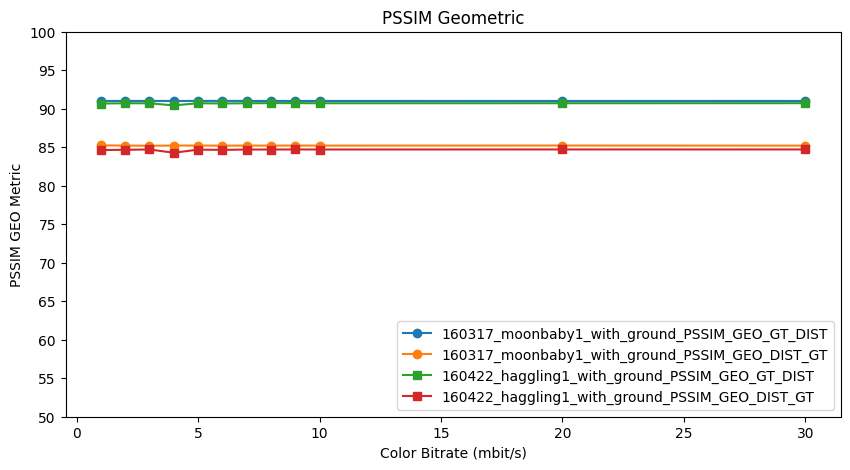

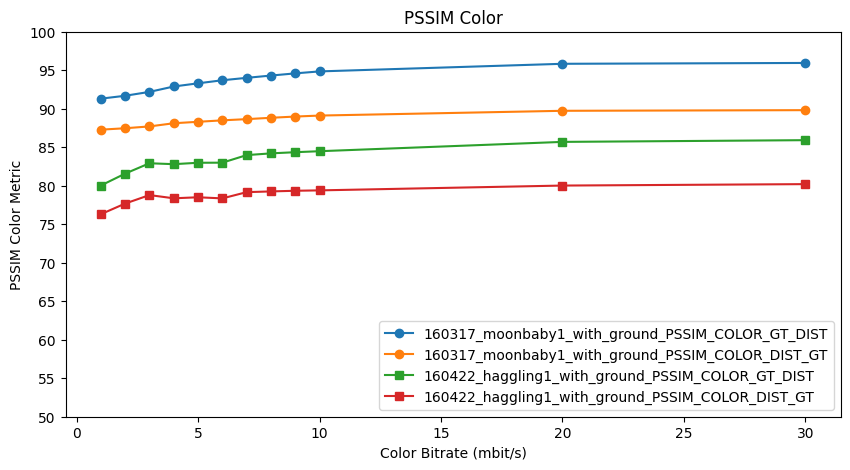

In [ ]:
# Fix depth at 110mbps and vary color bitrate
# Metric vs Color Bitrate

################# GEOMETRIC ############################

ground = "with_ground"
seq_names = [f"160317_moonbaby1_{ground}", f"160422_haggling1_{ground}"]

# color_bitrates_kbps = list(range(1000, 10000, 1000)) + list(range(10000, 100001, 10000))
color_bitrates = list(range(1000, 10000, 1000)) + list(range(10000, 30001, 10000))
metric_names = ["PSSIM_GEO_AB", "PSSIM_GEO_BA"]
metric_names_exp = ["PSSIM_GEO_GT_DIST", "PSSIM_GEO_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrate = 110000
depth_bitrate_m = depth_bitrate // 1000
color_bitrates_m = [color_bitrate // 1000 for color_bitrate in color_bitrates]

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, marker in zip(seq_names, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for color_bitrate, color_bitrate_m in zip(color_bitrates, color_bitrates_m):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_m}m_d_yuv{depth_bitrate_m}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[color_bitrate] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for color_bitrate, color_bitrate_m in zip(color_bitrates, color_bitrates_m):
            data = data_dict[color_bitrate]
            data = data[metric_name]
            metric_dict[color_bitrate] = data.mean(axis=0)
        ax.plot(
            color_bitrates_m,
            list(metric_dict.values()),
            label=seq_name + "_" + metric_name_exp,
            marker=marker,
        )

ax.set_ylim(50.0, 100.0)
ax.set_yticks(np.arange(50, 101, 5))
# ax.set_xticks(np.arange(0, 101, 10))
ax.set_xticks(np.arange(0, 31, 5))
ax.set_ylabel("PSSIM GEO Metric")
ax.set_xlabel("Color Bitrate (mbit/s)")
ax.set_title("PSSIM Geometric")
ax.legend(loc="lower right")


############# COLOR #############

ground = "with_ground"
seq_names = [f"160317_moonbaby1_{ground}", f"160422_haggling1_{ground}"]

# color_bitrates = list(range(1000, 10000, 1000)) + list(range(10000, 100001, 10000))
color_bitrates = list(range(1000, 10000, 1000)) + list(range(10000, 30001, 10000))
metric_names = ["PSSIM_COLOR_AB", "PSSIM_COLOR_BA"]
metric_names_exp = ["PSSIM_COLOR_GT_DIST", "PSSIM_COLOR_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrate = 110000
depth_bitrate_m = depth_bitrate // 1000
color_bitrates_m = [color_bitrate // 1000 for color_bitrate in color_bitrates]

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, marker in zip(seq_names, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for color_bitrate, color_bitrate_m in zip(color_bitrates, color_bitrates_m):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_m}m_d_yuv{depth_bitrate_m}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[color_bitrate] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for color_bitrate, color_bitrate_m in zip(color_bitrates, color_bitrates_m):
            data = data_dict[color_bitrate]
            data = data[metric_name]
            metric_dict[color_bitrate] = data.mean(axis=0)
        ax.plot(
            color_bitrates_m,
            list(metric_dict.values()),
            label=seq_name + "_" + metric_name_exp,
            marker=marker,
        )

ax.set_ylim(50.0, 100.0)
ax.set_yticks(np.arange(50, 101, 5))
# ax.set_xticks(np.arange(0, 101, 10))
ax.set_xticks(np.arange(0, 31, 5))
ax.set_ylabel("PSSIM Color Metric")
ax.set_xlabel("Color Bitrate (mbit/s)")
ax.set_title("PSSIM Color")
ax.legend(loc="lower right")

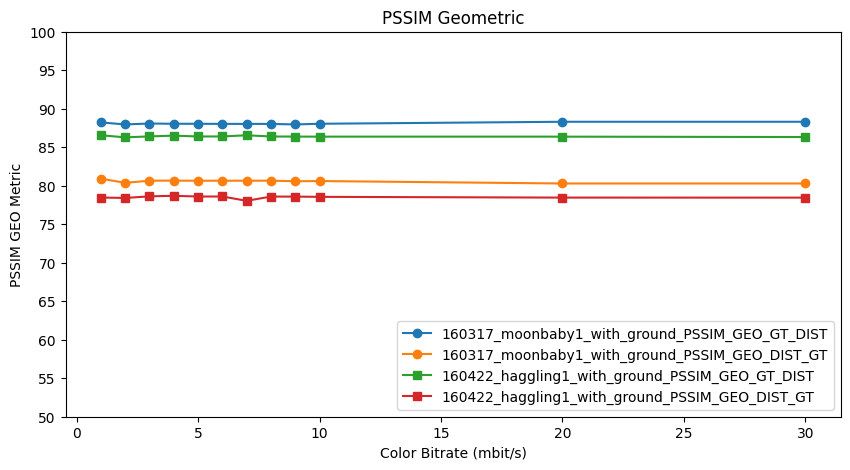

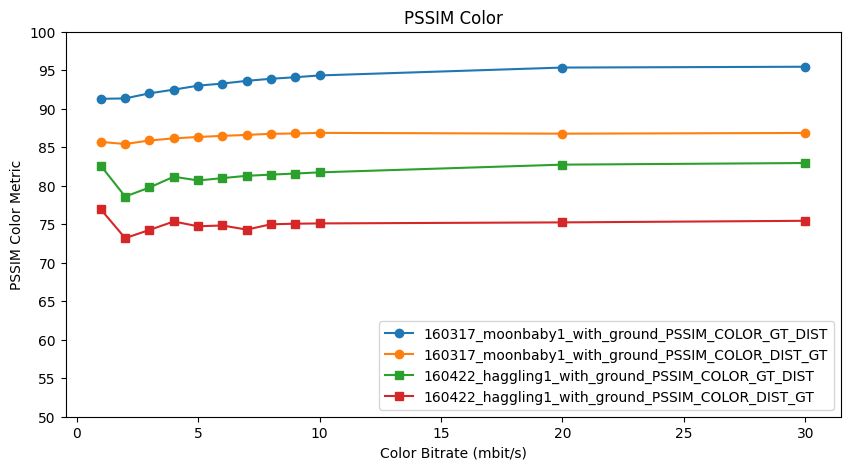

In [ ]:
# Fix depth at 60 mbps and vary color bitrate
# Metric vs Color Bitrate

################# GEOMETRIC ############################

ground = "with_ground"
seq_names = [f"160317_moonbaby1_{ground}", f"160422_haggling1_{ground}"]

color_bitrates = list(range(1000, 10000, 1000)) + list(range(10000, 30001, 10000))
metric_names = ["PSSIM_GEO_AB", "PSSIM_GEO_BA"]
metric_names_exp = ["PSSIM_GEO_GT_DIST", "PSSIM_GEO_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrate = 60000
depth_bitrate_m = depth_bitrate // 1000
color_bitrates_m = [color_bitrate // 1000 for color_bitrate in color_bitrates]

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, marker in zip(seq_names, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for color_bitrate, color_bitrate_m in zip(color_bitrates, color_bitrates_m):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_m}m_d_yuv{depth_bitrate_m}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[color_bitrate] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for color_bitrate, color_bitrate_m in zip(color_bitrates, color_bitrates_m):
            data = data_dict[color_bitrate]
            data = data[metric_name]
            metric_dict[color_bitrate] = data.mean(axis=0)
        ax.plot(
            color_bitrates_m,
            list(metric_dict.values()),
            label=seq_name + "_" + metric_name_exp,
            marker=marker,
        )

ax.set_ylim(50.0, 100.0)
ax.set_yticks(np.arange(50, 101, 5))
ax.set_xticks(np.arange(0, 31, 5))
ax.set_ylabel("PSSIM GEO Metric")
ax.set_xlabel("Color Bitrate (mbit/s)")
ax.set_title("PSSIM Geometric")
ax.legend(loc="lower right")


############# COLOR #############

ground = "with_ground"
seq_names = [f"160317_moonbaby1_{ground}", f"160422_haggling1_{ground}"]

color_bitrates = list(range(1000, 10000, 1000)) + list(range(10000, 30001, 10000))
metric_names = ["PSSIM_COLOR_AB", "PSSIM_COLOR_BA"]
metric_names_exp = ["PSSIM_COLOR_GT_DIST", "PSSIM_COLOR_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrate = 60000
depth_bitrate_m = depth_bitrate // 1000
color_bitrates_m = [color_bitrate // 1000 for color_bitrate in color_bitrates]

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, marker in zip(seq_names, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for color_bitrate, color_bitrate_m in zip(color_bitrates, color_bitrates_m):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_m}m_d_yuv{depth_bitrate_m}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[color_bitrate] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for color_bitrate, color_bitrate_m in zip(color_bitrates, color_bitrates_m):
            data = data_dict[color_bitrate]
            data = data[metric_name]
            metric_dict[color_bitrate] = data.mean(axis=0)
        ax.plot(
            color_bitrates_m,
            list(metric_dict.values()),
            label=seq_name + "_" + metric_name_exp,
            marker=marker,
        )

ax.set_ylim(50.0, 100.0)
ax.set_yticks(np.arange(50, 101, 5))
ax.set_xticks(np.arange(0, 31, 5))
ax.set_ylabel("PSSIM Color Metric")
ax.set_xlabel("Color Bitrate (mbit/s)")
ax.set_title("PSSIM Color")
ax.legend(loc="lower right")

Depth Bitrates per Point: [25.841943742345794, 38.76291561351869, 51.68388748469159, 64.60485935586449, 77.52583122703739, 90.44680309821028, 103.36777496938318, 116.28874684055607, 129.20971871172898, 142.13069058290188, 155.05166245407477, 167.97263432524767, 180.89360619642056, 193.81457806759346, 206.73554993876635, 219.65652180993925, 232.57749368111214, 245.49846555228507, 258.41943742345796]
Depth Bitrates per Point: [25.841943742345794, 38.76291561351869, 51.68388748469159, 64.60485935586449, 77.52583122703739, 90.44680309821028, 103.36777496938318, 116.28874684055607, 129.20971871172898, 142.13069058290188, 155.05166245407477, 167.97263432524767, 180.89360619642056, 193.81457806759346, 206.73554993876635, 219.65652180993925, 232.57749368111214, 245.49846555228507, 258.41943742345796]


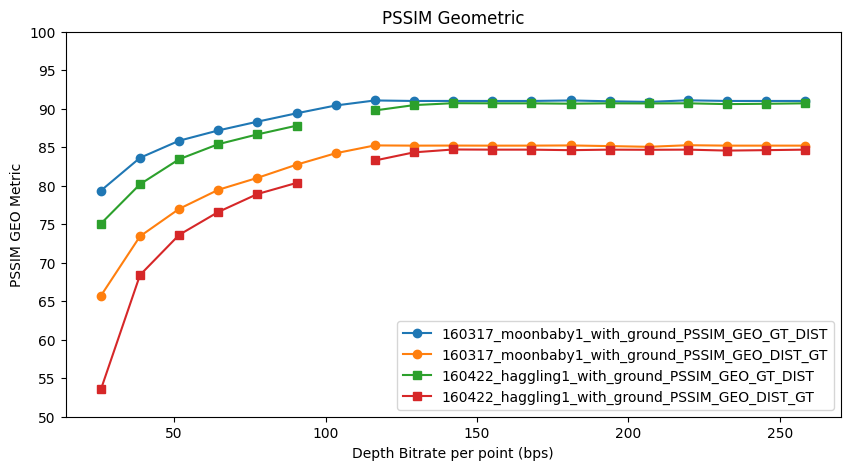

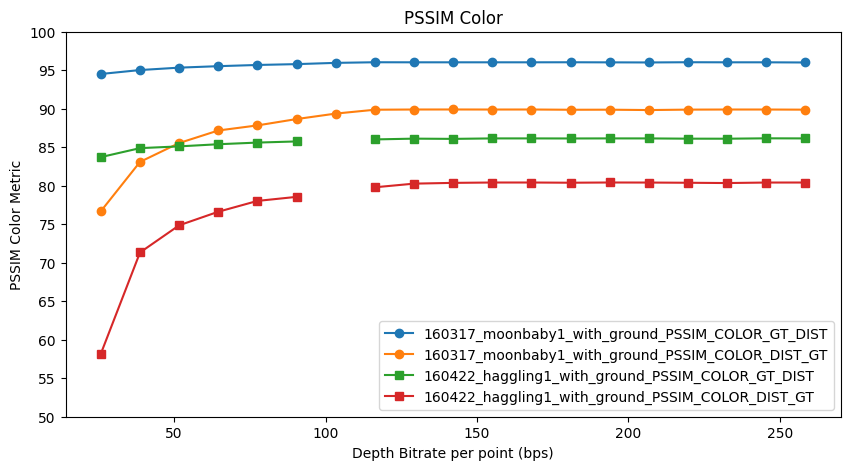

In [ ]:
# Fix color at 100 mpbs and change depth bitrate
# Measure Metric vs depth bitrate per point

############### GEOMETRIC ######################
ground = "with_ground"
seq_names = [f"160317_moonbaby1_{ground}", f"160422_haggling1_{ground}"]


color_bitrate = 100000
metric_names = ["PSSIM_GEO_AB", "PSSIM_GEO_BA"]
metric_names_exp = ["PSSIM_GEO_GT_DIST", "PSSIM_GEO_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrates_kbps = list(range(20000, 200001, 10000))
depth_bitrates_mbps = [depth_bitrate // 1000 for depth_bitrate in depth_bitrates_kbps]
color_bitrate_mbps = color_bitrate // 1000

fsize_filepath = os.path.join(
    f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
    f"frustum_size.csv",
)
fsize_data = pd.read_csv(fsize_filepath)
fsize_points_mean = fsize_data["FrustumPoints"].mean(axis=0)
depth_bitrates_per_point = [
    depth_bitrate_kbps * 1024.0 / fsize_points_mean
    for depth_bitrate_kbps in depth_bitrates_kbps
]
print(f"Depth Bitrates per Point: {depth_bitrates_per_point}")

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, marker in zip(seq_names, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for depth_bitrate_kbps, depth_bitrate_mbps in zip(
        depth_bitrates_kbps, depth_bitrates_mbps
    ):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_mbps}m_d_yuv{depth_bitrate_mbps}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[depth_bitrate_kbps] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for depth_bitrate_kbps, depth_bitrate_mbps in zip(
            depth_bitrates_kbps, depth_bitrates_mbps
        ):
            data = data_dict[depth_bitrate_kbps]
            data = data[metric_name]
            metric_dict[depth_bitrate_kbps] = data.mean(axis=0)
        ax.plot(
            depth_bitrates_per_point,
            list(metric_dict.values()),
            label=seq_name + "_" + metric_name_exp,
            marker=marker,
        )

ax.set_ylim(50.0, 100.0)
ax.set_yticks(np.arange(50, 101, 5))
# ax.set_xticks(np.arange(0, 201, 10))
ax.set_ylabel("PSSIM GEO Metric")
ax.set_xlabel("Depth Bitrate per point (bps)")
ax.set_title("PSSIM Geometric")
ax.legend(loc="lower right")

############### COLOR ######################

ground = "with_ground"
seq_names = [f"160317_moonbaby1_{ground}", f"160422_haggling1_{ground}"]


color_bitrate = 100000
metric_names = ["PSSIM_COLOR_AB", "PSSIM_COLOR_BA"]
metric_names_exp = ["PSSIM_COLOR_GT_DIST", "PSSIM_COLOR_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrates_kbps = list(range(20000, 200001, 10000))
depth_bitrates_mbps = [depth_bitrate // 1000 for depth_bitrate in depth_bitrates_kbps]
color_bitrate_mbps = color_bitrate // 1000

fsize_filepath = os.path.join(
    f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
    f"frustum_size.csv",
)
fsize_data = pd.read_csv(fsize_filepath)
fsize_points_mean = fsize_data["FrustumPoints"].mean(axis=0)
depth_bitrates_per_point = [
    depth_bitrate_kbps * 1024.0 / fsize_points_mean
    for depth_bitrate_kbps in depth_bitrates_kbps
]
print(f"Depth Bitrates per Point: {depth_bitrates_per_point}")

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, marker in zip(seq_names, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for depth_bitrate_kbps, depth_bitrate_mbps in zip(
        depth_bitrates_kbps, depth_bitrates_mbps
    ):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_mbps}m_d_yuv{depth_bitrate_mbps}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[depth_bitrate_kbps] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for depth_bitrate_kbps, depth_bitrate_mbps in zip(
            depth_bitrates_kbps, depth_bitrates_mbps
        ):
            data = data_dict[depth_bitrate_kbps]
            data = data[metric_name]
            metric_dict[depth_bitrate_kbps] = data.mean(axis=0)
        ax.plot(
            depth_bitrates_per_point,
            list(metric_dict.values()),
            label=seq_name + "_" + metric_name_exp,
            marker=marker,
        )

ax.set_ylim(50.0, 100.0)
ax.set_yticks(np.arange(50, 101, 5))
# ax.set_xticks(np.arange(0, 201, 10))
ax.set_ylabel("PSSIM Color Metric")
ax.set_xlabel("Depth Bitrate per point (bps)")
ax.set_title("PSSIM Color")
ax.legend(loc="lower right")

Color Bitrates per Point: [1.2920971871172897, 2.5841943742345794, 3.876291561351869, 5.168388748469159, 6.460485935586449, 7.752583122703738, 9.044680309821029, 10.336777496938318, 11.628874684055608, 12.920971871172897, 25.841943742345794, 38.76291561351869]
Color Bitrates per Point: [1.2920971871172897, 2.5841943742345794, 3.876291561351869, 5.168388748469159, 6.460485935586449, 7.752583122703738, 9.044680309821029, 10.336777496938318, 11.628874684055608, 12.920971871172897, 25.841943742345794, 38.76291561351869]


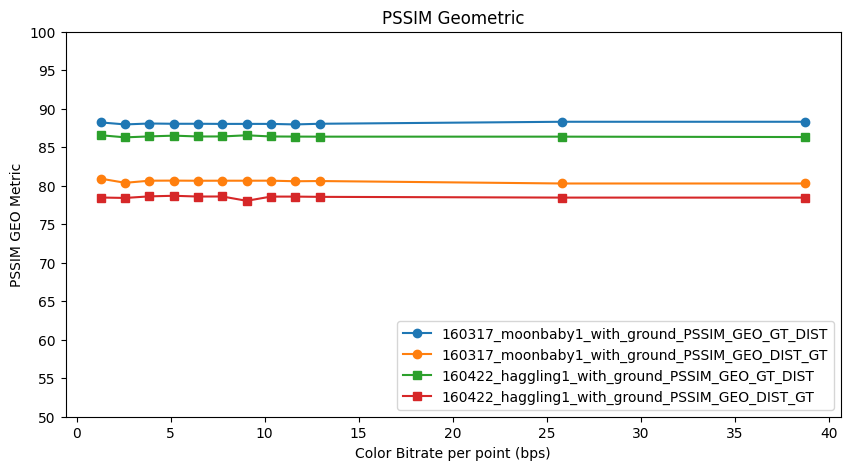

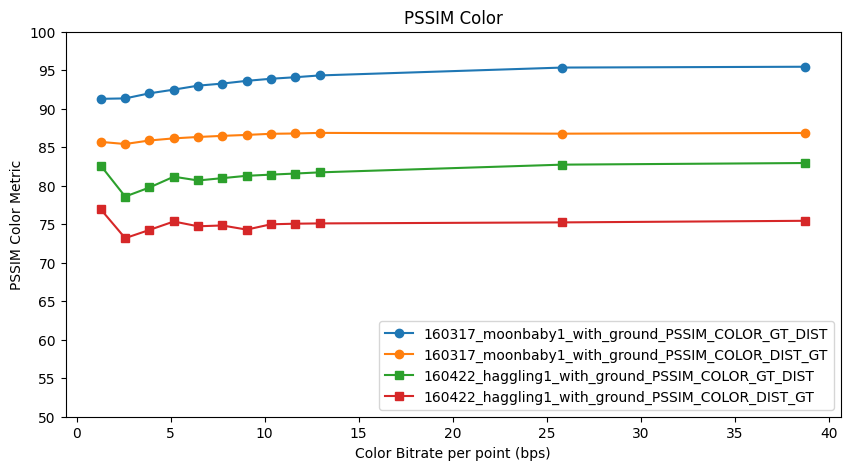

In [ ]:
# Fix depth at 60 mbps and vary color bitrate
# Measure Metric vs color bitrate per point

################# GEOMETRIC ############################

ground = "with_ground"
seq_names = [f"160317_moonbaby1_{ground}", f"160422_haggling1_{ground}"]

color_bitrates_kbps = list(range(1000, 10000, 1000)) + list(
    range(10000, 30001, 10000)
)  # in kbps
# color_bitrates_kbps = list(range(1000, 2000, 1000))
metric_names = ["PSSIM_GEO_AB", "PSSIM_GEO_BA"]
metric_names_exp = ["PSSIM_GEO_GT_DIST", "PSSIM_GEO_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrate = 60000
depth_bitrate_mbps = depth_bitrate // 1000
color_bitrates_mbps = [color_bitrate // 1000 for color_bitrate in color_bitrates_kbps]

fsize_filepath = os.path.join(
    f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
    f"frustum_size.csv",
)
fsize_data = pd.read_csv(fsize_filepath)
fsize_points_mean = fsize_data["FrustumPoints"].mean(axis=0)
color_bitrates_per_point = [
    color_bitrate_kbps * 1024.0 / fsize_points_mean
    for color_bitrate_kbps in color_bitrates_kbps
]
print(f"Color Bitrates per Point: {color_bitrates_per_point}")

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, marker in zip(seq_names, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )
    fsize_filepath = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
        f"frustum_size.csv",
    )
    fsize_data = pd.read_csv(fsize_filepath)

    data_dict = {}
    for color_bitrate_kbps, color_bitrate_mbps in zip(
        color_bitrates_kbps, color_bitrates_mbps
    ):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_mbps}m_d_yuv{depth_bitrate_mbps}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[color_bitrate_kbps] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for color_bitrate_kbps, color_bitrate_mbps in zip(
            color_bitrates_kbps, color_bitrates_mbps
        ):
            data_df = data_dict[color_bitrate_kbps]
            data_df = data_df.merge(fsize_data, on="Frame")
            metric_dict[color_bitrate_kbps] = data_df[metric_name].mean(axis=0)

            # color_bitrate_per_point = color_bitrate_kbps * 1024.0 / data_df['FrustumPoints'].mean(axis=0)
            # print(f"Seq:{seq_name}, Color Bitrate: {color_bitrate_kbps} kbps")
            # print(f"Seq:{seq_name}, Mean Frustum Points: {data_df['FrustumPoints'].mean(axis=0)}")
            # print(f"Seq:{seq_name}, Color Bitrate per Point: {color_bitrate_per_point}")
        ax.plot(
            color_bitrates_per_point,
            list(metric_dict.values()),
            label=seq_name + "_" + metric_name_exp,
            marker=marker,
        )

ax.set_ylim(50.0, 100.0)
ax.set_yticks(np.arange(50, 101, 5))
ax.set_ylabel("PSSIM GEO Metric")
ax.set_xlabel("Color Bitrate per point (bps)")
ax.set_title("PSSIM Geometric")
ax.legend(loc="lower right")

############# COLOR #############

ground = "with_ground"
seq_names = [f"160317_moonbaby1_{ground}", f"160422_haggling1_{ground}"]

color_bitrates_kbps = list(range(1000, 10000, 1000)) + list(range(10000, 30001, 10000))
metric_names = ["PSSIM_COLOR_AB", "PSSIM_COLOR_BA"]
metric_names_exp = ["PSSIM_COLOR_GT_DIST", "PSSIM_COLOR_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrate = 60000
depth_bitrate_mbps = depth_bitrate // 1000
color_bitrates_mbps = [color_bitrate // 1000 for color_bitrate in color_bitrates_kbps]

fsize_filepath = os.path.join(
    f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
    f"frustum_size.csv",
)
fsize_data = pd.read_csv(fsize_filepath)
fsize_points_mean = fsize_data["FrustumPoints"].mean(axis=0)
color_bitrates_per_point = [
    color_bitrate_kbps * 1024.0 / fsize_points_mean
    for color_bitrate_kbps in color_bitrates_kbps
]
print(f"Color Bitrates per Point: {color_bitrates_per_point}")

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, marker in zip(seq_names, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for color_bitrate_kbps, color_bitrate_mbps in zip(
        color_bitrates_kbps, color_bitrates_mbps
    ):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_mbps}m_d_yuv{depth_bitrate_mbps}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[color_bitrate_kbps] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for color_bitrate_kbps, color_bitrate_mbps in zip(
            color_bitrates_kbps, color_bitrates_mbps
        ):
            data = data_dict[color_bitrate_kbps]
            data = data[metric_name]
            metric_dict[color_bitrate_kbps] = data.mean(axis=0)
        ax.plot(
            color_bitrates_per_point,
            list(metric_dict.values()),
            label=seq_name + "_" + metric_name_exp,
            marker=marker,
        )

ax.set_ylim(50.0, 100.0)
ax.set_yticks(np.arange(50, 101, 5))
ax.set_ylabel("PSSIM Color Metric")
ax.set_xlabel("Color Bitrate per point (bps)")
ax.set_title("PSSIM Color")
ax.legend(loc="lower right")

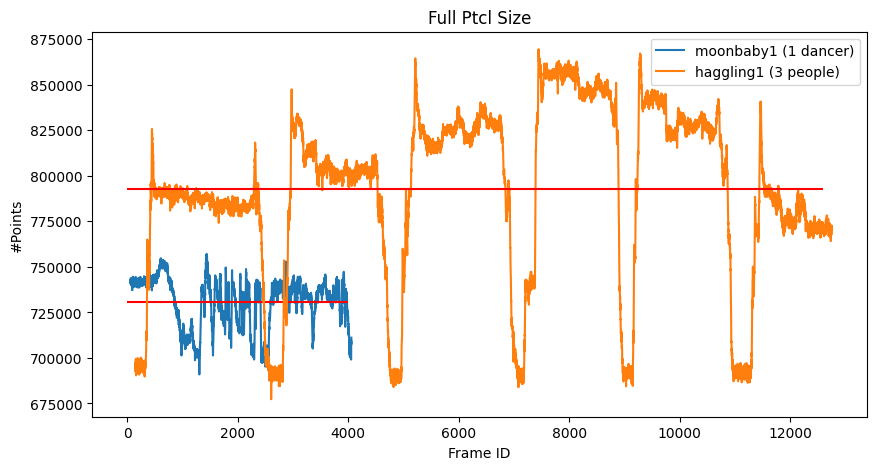

In [ ]:
seq_names = [f"160317_moonbaby1_{ground}", f"160422_haggling1_{ground}"]
labels = ["moonbaby1 (1 dancer)", "haggling1 (3 people)"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for seq_name, label in zip(seq_names, labels):
    fsize_filepath = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
        f"frustum_size.csv",
    )
    fsize_data = pd.read_csv(fsize_filepath)

    column_names = list(fsize_data.columns)
    # fsize_data[column_names[1]] /= 1024.0 * 1024.0

    ax.plot(fsize_data[column_names[0]], fsize_data[column_names[1]], label=label)
    ax.hlines(
        y=np.mean(fsize_data[column_names[1]]),
        xmin=0,
        xmax=len(fsize_data[column_names[1]]),
        color="r",
        linestyle="-",
    )
ax.set_title("Full Ptcl Size")
ax.set_xlabel("Frame ID")
ax.set_ylabel("#Points")
# ax.set_ylim(3.0, 5.0)
ax.legend()
# ax.legend(labels)
plt.show()

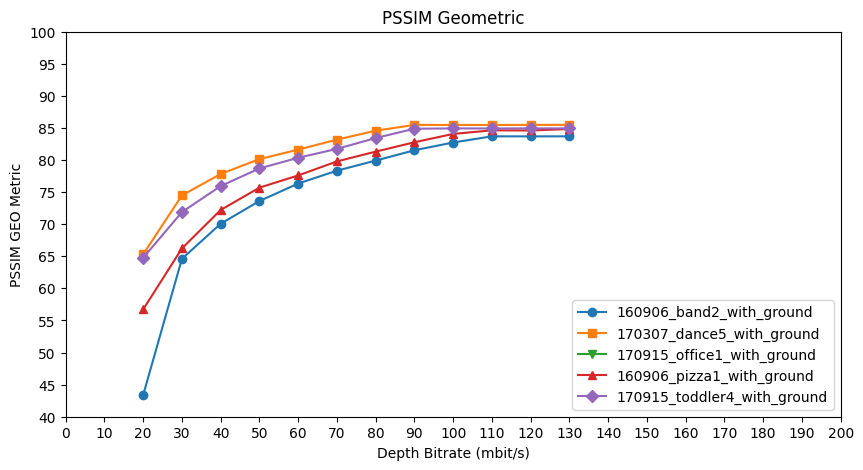

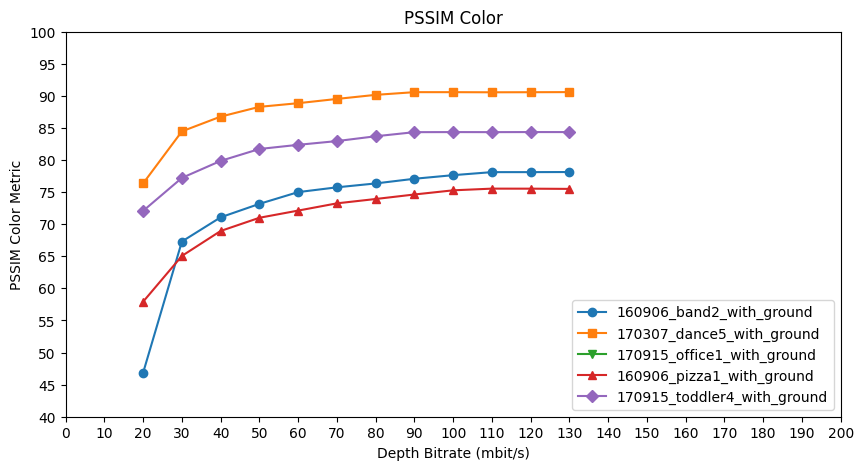

In [ ]:
# Fix color at 100 mbps and vary depth bitrate
# Metric vs Depth bitrate

################# PSSIM Geometric ####################

ground = "with_ground"
seq_names = [
    f"160906_band2_{ground}",
    f"170307_dance5_{ground}",
    f"170915_office1_{ground}",
    f"160906_pizza1_{ground}",
    f"170915_toddler4_{ground}",
]


color_bitrate = 100000
metric_names = ["PSSIM_GEO_BA"]
metric_names_exp = ["PSSIM_GEO_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrates = list(range(20000, 130001, 10000))
depth_bitrates_m = [depth_bitrate // 1000 for depth_bitrate in depth_bitrates]
color_bitrate_m = color_bitrate // 1000

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, marker in zip(seq_names, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for depth_bitrate, depth_bitrate_m in zip(depth_bitrates, depth_bitrates_m):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_m}m_d_yuv{depth_bitrate_m}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[depth_bitrate] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for depth_bitrate, depth_bitrate_m in zip(depth_bitrates, depth_bitrates_m):
            data = data_dict[depth_bitrate]
            data = data[metric_name]
            metric_dict[depth_bitrate] = data.mean(axis=0)
        ax.plot(
            depth_bitrates_m, list(metric_dict.values()), label=seq_name, marker=marker
        )

ax.set_ylim(40.0, 100.0)
ax.set_yticks(np.arange(40, 101, 5))
ax.set_xticks(np.arange(0, 201, 10))
ax.set_ylabel("PSSIM GEO Metric")
ax.set_xlabel("Depth Bitrate (mbit/s)")
ax.set_title("PSSIM Geometric")
ax.legend(loc="lower right")

plt.savefig(
    "/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/pssim_geometric_depth.pdf",
    bbox_inches="tight",
)

############## PSSIM Color ##############

ground = "with_ground"
seq_names = [
    f"160906_band2_{ground}",
    f"170307_dance5_{ground}",
    f"170915_office1_{ground}",
    f"160906_pizza1_{ground}",
    f"170915_toddler4_{ground}",
]


color_bitrate = 100000
metric_names = ["PSSIM_COLOR_BA"]
metric_names_exp = ["PSSIM_COLOR_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrates = list(range(20000, 130001, 10000))
depth_bitrates_m = [depth_bitrate // 1000 for depth_bitrate in depth_bitrates]
color_bitrate_m = color_bitrate // 1000

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, marker in zip(seq_names, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for depth_bitrate, depth_bitrate_m in zip(depth_bitrates, depth_bitrates_m):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_m}m_d_yuv{depth_bitrate_m}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[depth_bitrate] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for depth_bitrate, depth_bitrate_m in zip(depth_bitrates, depth_bitrates_m):
            data = data_dict[depth_bitrate]
            data = data[metric_name]
            metric_dict[depth_bitrate] = data.mean(axis=0)
        ax.plot(
            depth_bitrates_m, list(metric_dict.values()), label=seq_name, marker=marker
        )

ax.set_ylim(40.0, 100.0)
ax.set_yticks(np.arange(40, 101, 5))
ax.set_xticks(np.arange(0, 201, 10))
ax.set_ylabel("PSSIM Color Metric")
ax.set_xlabel("Depth Bitrate (mbit/s)")
ax.set_title("PSSIM Color")
ax.legend(loc="lower right")

# Save figure to pdf
plt.savefig(
    "/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/pssim_geometric_color.pdf",
    bbox_inches="tight",
)

Frustum Points: 741256
Frustum Points: 725275
Frustum Points: 704825
Frustum Points: 918030
Frustum Points: 707043
Frustum Points: 741256
Frustum Points: 725275
Frustum Points: 704825
Frustum Points: 918030
Frustum Points: 707043


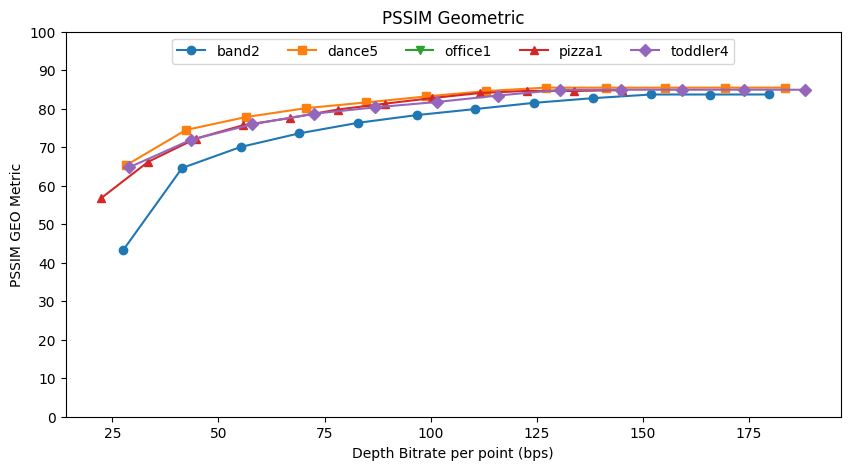

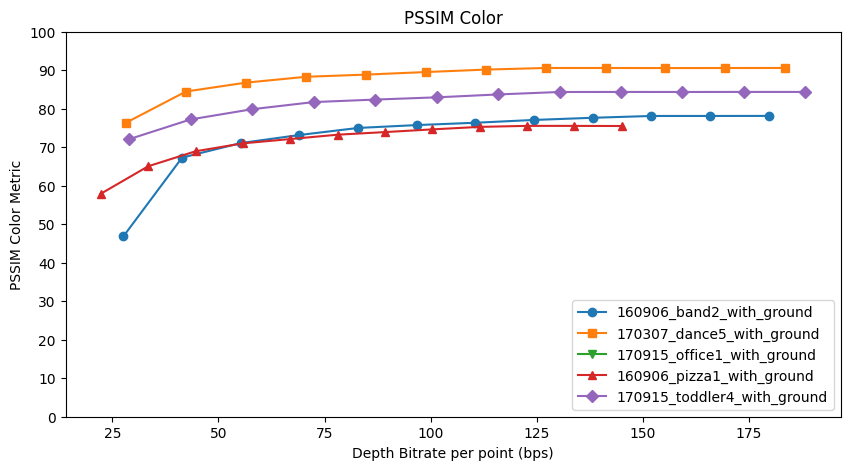

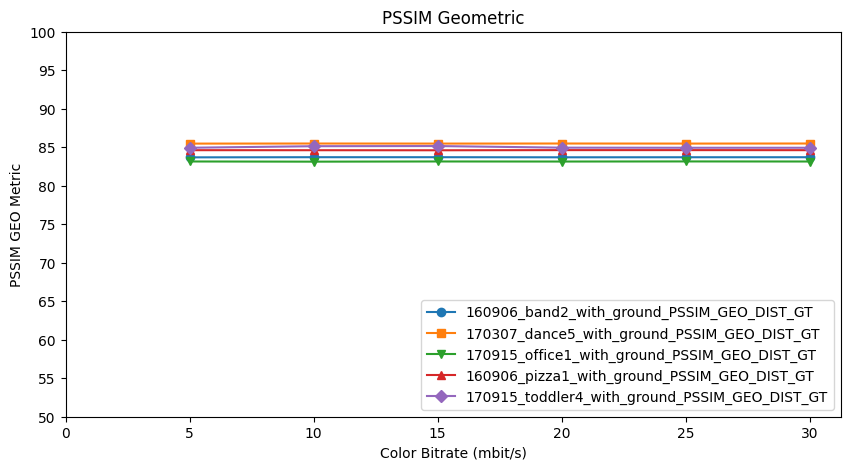

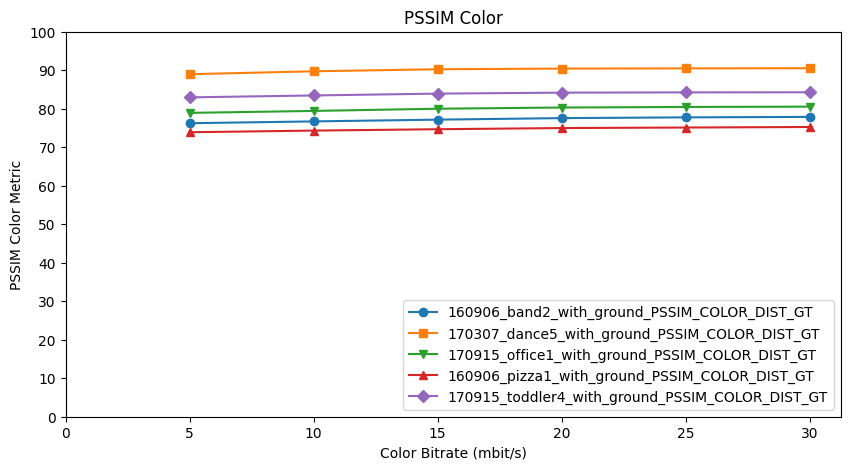

In [ ]:
# Fix depth at 110mbps and vary color bitrate
# Metric vs Color Bitrate

################# GEOMETRIC ############################

ground = "with_ground"
seq_names = [
    f"160906_band2_{ground}",
    f"170307_dance5_{ground}",
    f"170915_office1_{ground}",
    f"160906_pizza1_{ground}",
    f"170915_toddler4_{ground}",
]

color_bitrates = list(range(5000, 30001, 5000))
metric_names = ["PSSIM_GEO_BA"]
metric_names_exp = ["PSSIM_GEO_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrate = 130000
depth_bitrate_m = depth_bitrate // 1000
color_bitrates_m = [color_bitrate // 1000 for color_bitrate in color_bitrates]

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, marker in zip(seq_names, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for color_bitrate, color_bitrate_m in zip(color_bitrates, color_bitrates_m):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_m}m_d_yuv{depth_bitrate_m}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[color_bitrate] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for color_bitrate, color_bitrate_m in zip(color_bitrates, color_bitrates_m):
            data = data_dict[color_bitrate]
            data = data[metric_name]
            metric_dict[color_bitrate] = data.mean(axis=0)
        ax.plot(
            color_bitrates_m,
            list(metric_dict.values()),
            label=seq_name + "_" + metric_name_exp,
            marker=marker,
        )

ax.set_ylim(50.0, 100.0)
ax.set_yticks(np.arange(50, 101, 5))
# ax.set_xticks(np.arange(0, 101, 10))
ax.set_xticks(np.arange(0, 31, 5))
ax.set_ylabel("PSSIM GEO Metric")
ax.set_xlabel("Color Bitrate (mbit/s)")
ax.set_title("PSSIM Geometric")
ax.legend(loc="lower right")


############# COLOR #############

ground = "with_ground"
seq_names = [
    f"160906_band2_{ground}",
    f"170307_dance5_{ground}",
    f"170915_office1_{ground}",
    f"160906_pizza1_{ground}",
    f"170915_toddler4_{ground}",
]

color_bitrates = list(range(5000, 30001, 5000))
metric_names = ["PSSIM_COLOR_BA"]
metric_names_exp = ["PSSIM_COLOR_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrate = 130000
depth_bitrate_m = depth_bitrate // 1000
color_bitrates_m = [color_bitrate // 1000 for color_bitrate in color_bitrates]

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, marker in zip(seq_names, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for color_bitrate, color_bitrate_m in zip(color_bitrates, color_bitrates_m):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_m}m_d_yuv{depth_bitrate_m}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[color_bitrate] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for color_bitrate, color_bitrate_m in zip(color_bitrates, color_bitrates_m):
            data = data_dict[color_bitrate]
            data = data[metric_name]
            metric_dict[color_bitrate] = data.mean(axis=0)
        ax.plot(
            color_bitrates_m,
            list(metric_dict.values()),
            label=seq_name + "_" + metric_name_exp,
            marker=marker,
        )

ax.set_ylim(0.0, 100.0)
ax.set_yticks(np.arange(0, 101, 10))
# ax.set_xticks(np.arange(0, 101, 10))
ax.set_xticks(np.arange(0, 31, 5))
ax.set_ylabel("PSSIM Color Metric")
ax.set_xlabel("Color Bitrate (mbit/s)")
ax.set_title("PSSIM Color")
ax.legend(loc="lower right")

In [12]:
xytick_font = 18
xylabel_font = 24
legend_font = 16

Frustum Points: 741256
Frustum Points: 725275
Frustum Points: 704825
Frustum Points: 918030
Frustum Points: 707043
Frustum Points: 741256
Frustum Points: 725275
Frustum Points: 704825
Frustum Points: 918030
Frustum Points: 707043


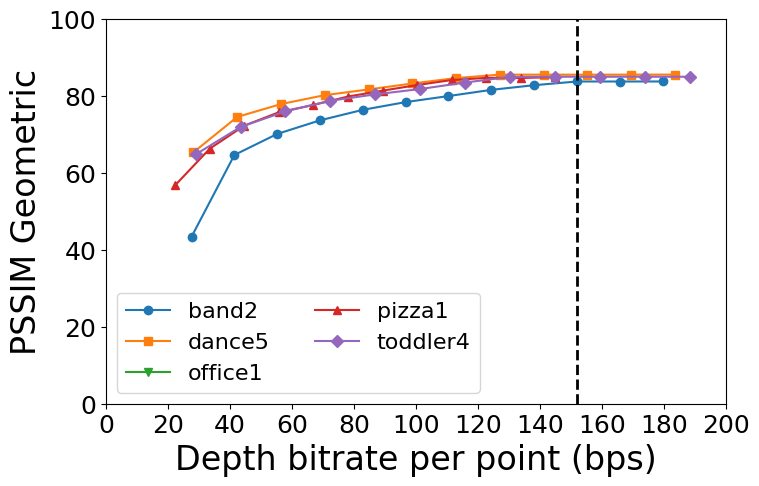

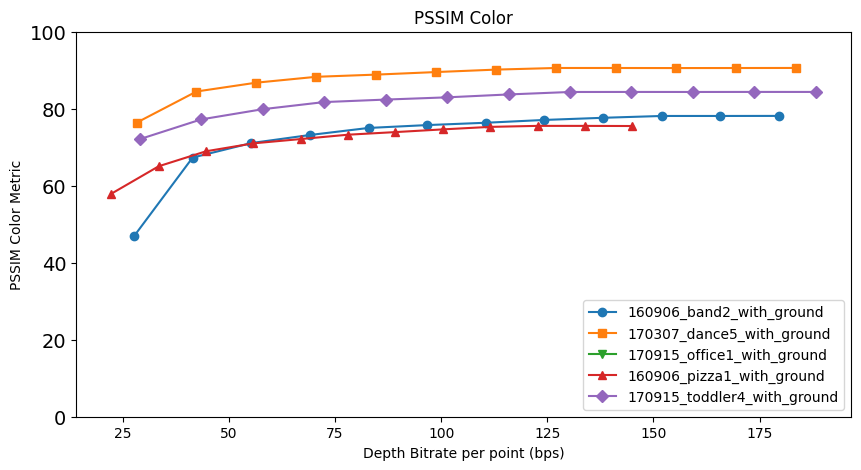

In [13]:
# Fix color at 100 mpbs and change depth bitrate
# Measure Metric vs depth bitrate per point

############### GEOMETRIC ######################
ground = "with_ground"
seq_names = [
    f"160906_band2_{ground}",
    f"170307_dance5_{ground}",
    f"170915_office1_{ground}",
    f"160906_pizza1_{ground}",
    f"170915_toddler4_{ground}",
]
seq_names_short = ["band2", "dance5", "office1", "pizza1", "toddler4"]


color_bitrate = 100000
metric_names = ["PSSIM_GEO_BA"]
metric_names_exp = ["PSSIM_GEO_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
depth_bitrates_kbps = list(range(20000, 130001, 10000))
depth_bitrates_mbps = [depth_bitrate // 1000 for depth_bitrate in depth_bitrates_kbps]
color_bitrate_mbps = color_bitrate // 1000

# fsize_filepath = os.path.join(f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/", f"frustum_size.csv")
# fsize_data = pd.read_csv(fsize_filepath)
# fsize_points_mean = fsize_data['FrustumPoints'].mean(axis=0)

fsize_points_mean = np.array([741256, 725275, 704825, 918030, 707043])

# depth_bitrates_per_point = [depth_bitrate_kbps * 1024.0 / fsize_points_mean for depth_bitrate_kbps in depth_bitrates_kbps]
# print(f"Depth Bitrates per Point: {depth_bitrates_per_point}")

depth_bitrates_per_point = {}

for fsize_points, seq_name in zip(fsize_points_mean, seq_names):
    print(f"Frustum Points: {fsize_points}")
    depth_bitrates_per_point[seq_name] = [
        depth_bitrate_kbps * 1024.0 / fsize_points
        for depth_bitrate_kbps in depth_bitrates_kbps
    ]

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, seq_name_short, marker in zip(seq_names, seq_names_short, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for depth_bitrate_kbps, depth_bitrate_mbps in zip(
        depth_bitrates_kbps, depth_bitrates_mbps
    ):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_mbps}m_d_yuv{depth_bitrate_mbps}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[depth_bitrate_kbps] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for depth_bitrate_kbps, depth_bitrate_mbps in zip(
            depth_bitrates_kbps, depth_bitrates_mbps
        ):
            data = data_dict[depth_bitrate_kbps]
            data = data[metric_name]
            metric_dict[depth_bitrate_kbps] = data.mean(axis=0)
        ax.plot(
            depth_bitrates_per_point[seq_name],
            list(metric_dict.values()),
            label=seq_name_short,
            marker=marker,
        )

ax.axvline(x=152, color="k", linewidth=2.0, linestyle="--")

# # Set major gridlines
# ax.grid(True, which='major', linestyle='--', linewidth='0.2', color='black')

# # Set minor gridlines
# ax.grid(True, which='minor', linestyle='--', linewidth='0.2', color='gray')

ax.set_ylim(0.0, 100.0)
ax.set_yticks(np.arange(0, 101, 20))
ax.set_yticklabels(np.arange(0, 101, 20), fontsize=xytick_font)
ax.set_xticks(np.arange(0, 201, 20))
ax.set_xticklabels(np.arange(0, 201, 20), fontsize=xytick_font)
ax.set_ylabel("PSSIM Geometric", fontsize=xylabel_font)
ax.set_xlabel("Depth bitrate per point (bps)", fontsize=xylabel_font)
# ax.set_title("PSSIM Color")
ax.legend(loc="lower left", ncols=2, fontsize=legend_font)

plt.savefig(
    "/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/pssim_geometric_depth_per_point.pdf",
    bbox_inches="tight",
)

############### COLOR ######################

ground = "with_ground"
seq_names = [
    f"160906_band2_{ground}",
    f"170307_dance5_{ground}",
    f"170915_office1_{ground}",
    f"160906_pizza1_{ground}",
    f"170915_toddler4_{ground}",
]


color_bitrate = 100000
metric_names = ["PSSIM_COLOR_BA"]
metric_names_exp = ["PSSIM_COLOR_DIST_GT"]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
depth_bitrates_kbps = list(range(20000, 130001, 10000))
depth_bitrates_mbps = [depth_bitrate // 1000 for depth_bitrate in depth_bitrates_kbps]
color_bitrate_mbps = color_bitrate // 1000

# fsize_filepath = os.path.join(f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/", f"frustum_size.csv")
# fsize_data = pd.read_csv(fsize_filepath)
# fsize_points_mean = fsize_data['FrustumPoints'].mean(axis=0)

fsize_points_mean = np.array([741256, 725275, 704825, 918030, 707043])

# depth_bitrates_per_point = [depth_bitrate_kbps * 1024.0 / fsize_points_mean for depth_bitrate_kbps in depth_bitrates_kbps]
# print(f"Depth Bitrates per Point: {depth_bitrates_per_point}")

depth_bitrates_per_point = {}

for fsize_points, seq_name in zip(fsize_points_mean, seq_names):
    print(f"Frustum Points: {fsize_points}")
    depth_bitrates_per_point[seq_name] = [
        depth_bitrate_kbps * 1024.0 / fsize_points
        for depth_bitrate_kbps in depth_bitrates_kbps
    ]

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, marker in zip(seq_names, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for depth_bitrate_kbps, depth_bitrate_mbps in zip(
        depth_bitrates_kbps, depth_bitrates_mbps
    ):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_mbps}m_d_yuv{depth_bitrate_mbps}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[depth_bitrate_kbps] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for depth_bitrate_kbps, depth_bitrate_mbps in zip(
            depth_bitrates_kbps, depth_bitrates_mbps
        ):
            data = data_dict[depth_bitrate_kbps]
            data = data[metric_name]
            metric_dict[depth_bitrate_kbps] = data.mean(axis=0)
        ax.plot(
            depth_bitrates_per_point[seq_name],
            list(metric_dict.values()),
            label=seq_name,
            marker=marker,
        )

ax.set_ylim(0.0, 100.0)
ax.set_yticks(np.arange(0, 101, 20))
ax.set_yticklabels(np.arange(0, 101, 20), fontsize=14)
# ax.set_xticks(np.arange(0, 201, 10))
ax.set_ylabel("PSSIM Color Metric")
ax.set_xlabel("Depth Bitrate per point (bps)")
ax.set_title("PSSIM Color")
ax.legend(loc="lower right")


# Save figure to pdf
plt.savefig(
    "/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/pssim_color_depth_per_point.pdf",
    bbox_inches="tight",
)

Frustum Points: 741256
Frustum Points: 725275
Frustum Points: 704825
Frustum Points: 918030
Frustum Points: 707043
Color Bitrates per Point: {'160906_band2_with_ground': [6.907195354911124, 13.814390709822248, 20.721586064733373, 27.628781419644497, 34.53597677455562, 41.443172129466745], '170307_dance5_with_ground': [7.0593912653820965, 14.118782530764193, 21.17817379614629, 28.237565061528386, 35.29695632691048, 42.35634759229258], '170915_office1_with_ground': [7.2642145213350835, 14.528429042670167, 21.79264356400525, 29.056858085340334, 36.321072606675415, 43.5852871280105], '160906_pizza1_with_ground': [5.577159787806499, 11.154319575612998, 16.731479363419496, 22.308639151225996, 27.885798939032494, 33.46295872683899], '170915_toddler4_with_ground': [7.241426617617316, 14.482853235234632, 21.724279852851947, 28.965706470469264, 36.20713308808658, 43.44855970570389]}


/tmp/ipykernel_1188245/1687502522.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(0, 46, 5), fontsize=xytick_font)


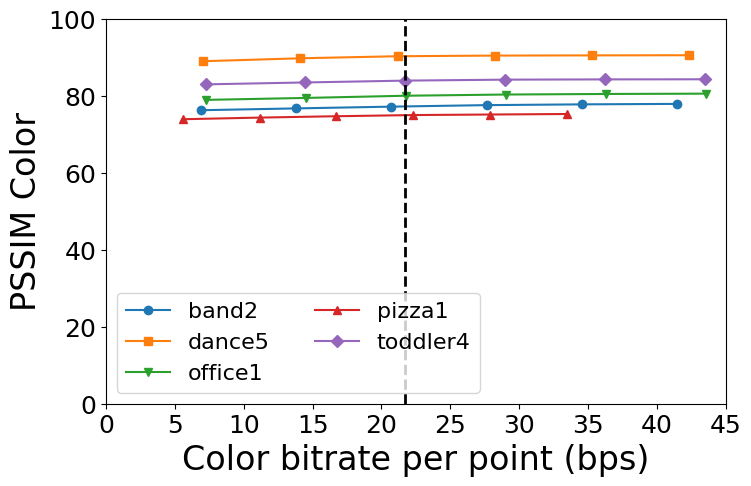

In [14]:
# Fix depth at 130 mbps and vary color bitrate
# Measure Metric vs color bitrate per point

############# COLOR #############

ground = "with_ground"
seq_names = [
    f"160906_band2_{ground}",
    f"170307_dance5_{ground}",
    f"170915_office1_{ground}",
    f"160906_pizza1_{ground}",
    f"170915_toddler4_{ground}",
]
seq_names_short = ["band2", "dance5", "office1", "pizza1", "toddler4"]

color_bitrates_kbps = list(range(5000, 30001, 5000))
metric_names = ["PSSIM_COLOR_BA"]
metric_names_exp = ["PSSIM_COLOR_DIST_GT"]

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
depth_bitrate = 130000
depth_bitrate_mbps = depth_bitrate // 1000
color_bitrates_mbps = [color_bitrate // 1000 for color_bitrate in color_bitrates_kbps]

color_bitrates_per_point = {}

fsize_points_mean = np.array([741256, 725275, 704825, 918030, 707043])
for fsize_points, seq_name in zip(fsize_points_mean, seq_names):
    print(f"Frustum Points: {fsize_points}")
    color_bitrates_per_point[seq_name] = [
        color_bitrate_kbps * 1024.0 / fsize_points
        for color_bitrate_kbps in color_bitrates_kbps
    ]
print(f"Color Bitrates per Point: {color_bitrates_per_point}")

markers = [
    "o",
    "s",
    "v",
    "^",
    "D",
    "X",
    "P",
    "p",
    "H",
    "h",
    "*",
    "d",
    "x",
    "+",
    "|",
    "_",
]
markers = markers[: len(seq_names)]
for seq_name, seq_name_short, marker in zip(seq_names, seq_names_short, markers):
    data_path = os.path.join(
        f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim",
        seq_name,
    )

    data_dict = {}
    for color_bitrate_kbps, color_bitrate_mbps in zip(
        color_bitrates_kbps, color_bitrates_mbps
    ):
        data_filepath = os.path.join(
            f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/",
            f"3D_c{color_bitrate_mbps}m_d_yuv{depth_bitrate_mbps}m_pssim.csv",
        )

        data = pd.read_csv(data_filepath)
        column_names = list(data.columns)[1:]
        data_dict[color_bitrate_kbps] = data

    # Box plot for each metric for all depth bitrates
    for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
        metric_dict = {}
        for color_bitrate_kbps, color_bitrate_mbps in zip(
            color_bitrates_kbps, color_bitrates_mbps
        ):
            data = data_dict[color_bitrate_kbps]
            data = data[metric_name]
            metric_dict[color_bitrate_kbps] = data.mean(axis=0)
        ax.plot(
            color_bitrates_per_point[seq_name],
            list(metric_dict.values()),
            label=seq_name_short,
            marker=marker,
        )


# markers = ['o', 's', 'v', '^', 'D', 'X', 'P', 'p', 'H', 'h', '*', 'd', 'x', '+', '|', '_']
# markers = markers[:len(seq_names)]
# for seq_name, marker in zip(seq_names, markers):
#     data_path = os.path.join(f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim", seq_name)

#     data_dict = {}
#     for depth_bitrate_kbps, depth_bitrate_mbps in zip(depth_bitrates_kbps, depth_bitrates_mbps):
#         data_filepath = os.path.join(f"/datassd/pipeline/client_tiled/pipeline_new/{seq_name}/comp_o3d_pointssim/", f"3D_c{color_bitrate_mbps}m_d_yuv{depth_bitrate_mbps}m_pssim.csv")

#         data = pd.read_csv(data_filepath)
#         column_names = list(data.columns)[1:]
#         data_dict[depth_bitrate_kbps] = data


#     # Box plot for each metric for all depth bitrates
#     for metric_name, metric_name_exp in zip(metric_names, metric_names_exp):
#         metric_dict = {}
#         for depth_bitrate_kbps, depth_bitrate_mbps in zip(depth_bitrates_kbps, depth_bitrates_mbps):
#             data = data_dict[depth_bitrate_kbps]
#             data = data[metric_name]
#             metric_dict[depth_bitrate_kbps] = data.mean(axis=0)
#         ax.plot(depth_bitrates_per_point[seq_name], list(metric_dict.values()), label=seq_name, marker=marker)

# Set major gridlines
# ax.grid(True, which='major', linestyle='dashed', linewidth='0.1', color='black')

# # Set minor gridlines
# ax.grid(True, which='minor', linestyle='dashed', linewidth='0.1', color='gray')

ax.axvline(x=21.7, color="k", linewidth=2.0, linestyle="--")

# # Change major gridline spacing
# ax.xaxis.set_major_locator(MultipleLocator(2))  # Change 1 to your desired spacing for x-axis
# ax.yaxis.set_major_locator(MultipleLocator(2))  # Change 0.5 to your desired spacing for y-axis

# # Change minor gridline spacing
# ax.xaxis.set_minor_locator(MultipleLocator(2))  # Change 0.5 to your desired spacing for x-axis minor ticks
# ax.yaxis.set_minor_locator(MultipleLocator(2))  # Change 0.1 to your desired spacing for y-axis minor ticks

ax.set_ylim(0.0, 100.0)
ax.set_yticks(np.arange(0, 101, 20))
ax.set_yticklabels(np.arange(0, 101, 20), fontsize=xytick_font)
ax.set_xlim(0.0, 45.0)
ax.set_xticklabels(np.arange(0, 46, 5), fontsize=xytick_font)
ax.set_ylabel("PSSIM Color", fontsize=xylabel_font)
ax.set_xlabel("Color bitrate per point (bps)", fontsize=xylabel_font)
# ax.set_title("PSSIM Color")
ax.legend(loc="lower left", ncols=2, fontsize=legend_font)


# Save figure to pdf
plt.savefig(
    "/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/pssim_color_color_per_point.pdf",
    bbox_inches="tight",
)